In [1]:
#import image datagenerator library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

In [3]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_transform = train_datagen.flow_from_directory(r'./dataset/train',
                                            target_size=(128,128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 2664 images belonging to 6 classes.


In [5]:
test_transform = val_datagen.flow_from_directory(r'./dataset/val',
                                            target_size=(128,128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 606 images belonging to 6 classes.


In [6]:
#to define linear initializations import Sequential
from tensorflow.keras.models import Sequential
#To add layers import Dense
from tensorflow.keras.layers import Dense
# to create a convolution kernel import Convolution2D
from tensorflow.keras.layers import Convolution2D
# Adding Max pooling Layer
from tensorflow.keras.layers import MaxPooling2D
# Adding Flatten Layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
# Initializing the model
model=Sequential()

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [9]:
model.add(Flatten()) 

In [10]:
model.output_shape

(None, 127008)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Adding 1st hidden layer
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))

In [13]:
model.add(Dense(kernel_initializer='uniform',activation='relu',units=68))

In [14]:
model.add(Dense(kernel_initializer='uniform',activation='softmax',units=6))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 150)               19051350  
_________________________________________________________________
dense_1 (Dense)              (None, 68)                10268     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 414       
Total params: 19,062,928
Trainable params: 19,062,928
Non-trainable params: 0
____________________________________________

In [17]:
res = model.fit_generator(train_transform,steps_per_epoch=2664//64,validation_steps=606//64,epochs=30,
                          validation_data=test_transform)

C:\Users\smartbridge\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
41/41 [==============================] - 45s 1s/step - loss: 1.7747 - acc: 0.2061 - val_loss: 1.4693 - val_acc: 0.4132
Epoch 2/30
41/41 [==============================] - 53s 1s/step - loss: 1.5144 - acc: 0.3893 - val_loss: 1.3684 - val_acc: 0.4410
Epoch 3/30
41/41 [==============================] - 43s 1s/step - loss: 1.3444 - acc: 0.4624 - val_loss: 1.2694 - val_acc: 0.5122
Epoch 4/30
41/41 [==============================] - 49s 1s/step - loss: 1.2176 - acc: 0.5210 - val_loss: 1.1758 - val_acc: 0.5469
Epoch 5/30
41/41 [==============================] - 47s 1s/step - loss: 1.2179 - acc: 0.4982 - val_loss: 1.0858 - val_acc: 0.5694
Epoch 6/30
41/41 [==============================] - 48s 1s/step - loss: 1.1780 - acc: 0.5352 - val_loss: 1.0922 - val_acc: 0.5868
Epoch 7/30
41/41 [==============================] - 50s 1s/step - loss: 1.0955 - acc: 0.5836 - val_loss: 1.0062 - val_acc: 0.6111
Epoch 8/30
41/41 [==============================] - 53s 1s/step - loss: 1.0096 - acc: 0.61

In [19]:
model.save('Garbage1.h5')

In [70]:
#import numpy library
import numpy as np
#import load_model method to load our saved model
from tensorflow.keras.models import load_model
#import image from keras.preprocessing
from tensorflow.keras.preprocessing import image
#loading our saved model file
model = load_model("Garbage1.h5")
img = image.load_img(r"C:\Users\smartbridge\Desktop\metal.jpg",
                     target_size=(128,128))

x=image.img_to_array(img) #converting in to array format

x=np.expand_dims(x,axis=0) #changing its dimensions as per our requirement 
#img_data=preprocess_input(x)
#img_data.shape

In [71]:
a=np.argmax(model.predict(x), axis=1)

In [72]:
index=['0', '1', '2', '3', '4','5']
result = str(index[a[0]])
result

'2'

In [41]:
import matplotlib.pyplot as plt

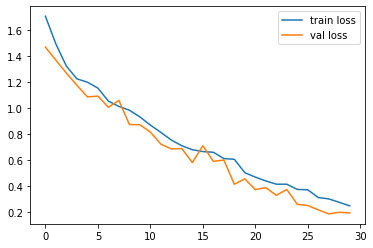

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
plt.plot(res.history['loss'], label='train loss')
plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

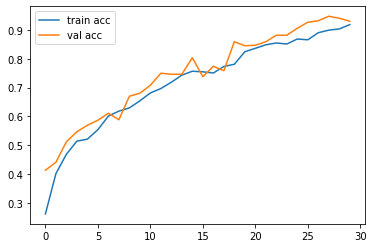

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the accuracy
plt.plot(res.history['acc'], label='train acc')
plt.plot(res.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')